# Approach For Merging Train and Test data

1. Problem Description
   - Objective
   - Data Description
   - Error metric
2. Importing required libraries
3. Loading data for merging
4. Analysing Independent Files
5. Aggregating Precipitation and Hourly data
6. Merging with AllStation Data
7. Analysing Train data
   - Feature Engineering for Target Variable 
8. Merging Train data wrt Origin and Destination
9. Merging origin and destination files
10. Exporting Data for EDA and Model Building

# Problem Description

### Flight Delay Analysis and Prediction

Air travel plays a significant role in the economies of both airlines and the airports, its very important to increase the quality of service for the passengers and every stakeholders involved. Flight delays cannot be prevented and plays a crucial role in an income of the airlines as well as customer satisfaction.

An accurate estimation of flight delays can be helpful in increasing customer satisfaction and also increasing the income of the concerned airlines.

Additionally, flight delays make passengers concerned and this leads to an extra expense for the airlines and the airports, as they need to provide accomodation and food as per the delay.

Flight Delays often lead to air traffic congestion due to subsequent flights which may troubles airport authorties.

Security, climate, weather conditions, scarcity of parts, air traffic are some of the reasons which leads to flight delays.

## Objective :

Target attribute: __"FlightDelayStatus"__ (discrete variable: 2 classes)
 - 1 : If Flight is delayed by more than 15 minutes
 - 2 : Flight not delayed
 
### Dataset Description:

Datasets provided are as follows :
 - __Flights Data:__
"Train.csv" & "Test.csv" consisting of flight details like ID, origin, destination, timestamps etc. and Target Attribute "FlightDelayStatus" to be derived from ActualArrivalTimeStamp.

 - __AllStationsData_PHD:__
This flie gives the link of "WeatherStationID"  & "AirportID" and has the attributes viz.,  Latitude, Longitude, TimeZone etc
                                                         
 - __Weather information:__
Folder “weatherdatatoconsider” has sub-folders 2004 and 2005. These files consist of the details about aviation weather during the 2004 and 2005  
          

### Error Metric for checking model Performance : F1 Score



## Importing the required libraries and packages

In [1]:
import os
import glob                 #to retrieve files/pathnames matching a specified pattern
import numpy as np
import pandas as pd

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

import PIL                                          # to read images
from PIL import Image

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [2]:
os.getcwd()

'C:\\Users\\Himanshu\\Downloads\\PHD\\DataForPHD_Forall'

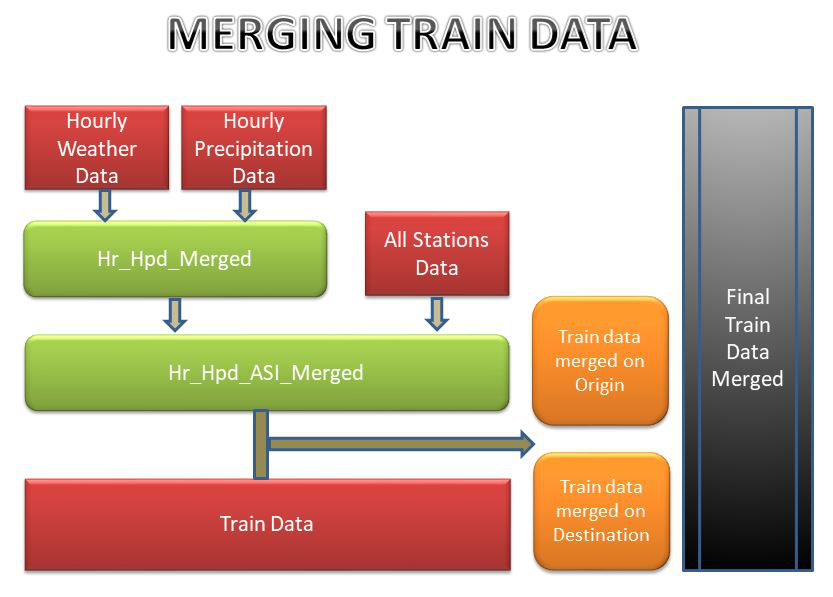

In [3]:
## Display Merge process
merge = Image.open(r'C:\\Users\\Himanshu\\Downloads\\DataForPHD_Forall\\Merge_photo.jpg')
merge

In [4]:
print("Loading hpd records and getting the dimensions :")
path = r'C:\\Users\\Himanshu\\Downloads\\PHD\\DataForPHD_Forall\\20210322_weatherdatatoconsider\\2004\\'  # using path
all_files = glob.glob(path + "*hpd.txt")        # here *hpd denotes reading all the files ending with hpd.txt 

li = []

for filename in all_files:                      #Appending all the files in a dataframe
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

hpd_2004 = pd.concat(li, axis=0, ignore_index=True)
print(hpd_2004.shape)

Loading hpd records and getting the dimensions :
(7697386, 4)


In [5]:
print("Loading hourly records and getting the dimensions :")
path = r'C:\\Users\\Himanshu\\Downloads\\PHD\\DataForPHD_Forall\\20210322_weatherdatatoconsider\\2004\\'  
all_files = glob.glob(path + "*hourly.txt")         

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

hr_2004 = pd.concat(li, axis=0, ignore_index=True)
print(hr_2004.shape)

Loading hourly records and getting the dimensions :
(6485177, 12)


In [6]:
print("Loading All Stations data and getting the dimensions:")
asd = pd.read_csv(r"C:\Users\Himanshu\Downloads\PHD\DataForPHD_Forall\20210322_weatherdatatoconsider\AllStationsData_PHD.txt", sep = "|")
print(asd.shape)

Loading All Stations data and getting the dimensions:
(1744, 8)


In [7]:
print("Loading main train_data file with target column and getting the dimensions:")
t_data=pd.read_csv(r"C:\Users\Himanshu\Downloads\PHD\DataForPHD_Forall\20210322_Traindata\Train.csv", sep = ',', na_values = (" ",",","?"))
print(t_data.shape)

Loading main train_data file with target column and getting the dimensions:
(7861, 12)


### Analysing  hourly and hpd data for merging 

 #### Precipitation data

In [8]:
print(hpd_2004.head())      
print(type(hpd_2004))        # class type of imported file

   WeatherStationID  YearMonthDay  Time  HourlyPrecip
0              3034      20040101    10           0.0
1              3035      20040101    10           0.0
2              3039      20040101    10           0.0
3              3040      20040101    10           0.0
4              4128      20040101    10           0.0
<class 'pandas.core.frame.DataFrame'>


In [9]:
hpd_2004.dtypes       #datatypes of variables

WeatherStationID      int64
YearMonthDay          int64
Time                  int64
HourlyPrecip        float64
dtype: object

In [10]:
hpd_2004.nunique()       #Checking unique values

WeatherStationID    1447
YearMonthDay         184
Time                1420
HourlyPrecip         259
dtype: int64

In [11]:
hpd_2004.isna().sum()       #Checking Null values

WeatherStationID         0
YearMonthDay             0
Time                     0
HourlyPrecip        251266
dtype: int64

In [12]:
print(hpd_2004.isna().sum()/len(hpd_2004)*100)
print(hpd_2004.shape)

WeatherStationID    0.000000
YearMonthDay        0.000000
Time                0.000000
HourlyPrecip        3.264303
dtype: float64
(7697386, 4)


In [13]:
hpd_2004 = hpd_2004.dropna(axis = 0)   #Dropping na Values ,since only 3% rows consist of Na values 
print(hpd_2004.shape)

(7446120, 4)


In [14]:
hpd_2004.isna().sum()

WeatherStationID    0
YearMonthDay        0
Time                0
HourlyPrecip        0
dtype: int64

#### Hourly Data

In [15]:
print(hr_2004.head())
print(type(hr_2004))         #class type of imported file

   WeatherStationID  YearMonthDay  Time         SkyConditions Visibility  \
0              3034      20040101    10                OVC095       10SM   
1              3035      20040101    10                SCT110       10SM   
2              3039      20040101    10                OVC002     0.25SM   
3              3040      20040101    10                   CLR       10SM   
4              4128      20040101    10  BKN001 BKN010 OVC024        4SM   

    DBT  DewPointTemp  RelativeHumidityPercent WindSpeed WindDirection  \
0  30.0           7.0                     38.0         0           000   
1  43.0          18.0                     37.0         0           000   
2  14.0          12.0                     92.0         0           000   
3  30.0          21.0                     69.0         9           250   
4   NaN           NaN                      NaN         0           000   

   WindGustValue  StationPressure  
0            0.0            30.10  
1            0.0          

In [16]:
hr_2004.dtypes               #datatypes of features

WeatherStationID             int64
YearMonthDay                 int64
Time                         int64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
dtype: object

In [17]:
hr_2004.nunique()             #Checking unique values in data

WeatherStationID             1447
YearMonthDay                  157
Time                         1428
SkyConditions              247019
Visibility                     73
DBT                           170
DewPointTemp                  140
RelativeHumidityPercent        99
WindSpeed                     129
WindDirection                  83
WindGustValue                 141
StationPressure              1006
dtype: int64

In [18]:
hr_2004.isna().sum()          #Checking null values in data

WeatherStationID                 0
YearMonthDay                     0
Time                             0
SkyConditions               162260
Visibility                  151688
DBT                        1162698
DewPointTemp               1176789
RelativeHumidityPercent    1179911
WindSpeed                    33407
WindDirection                33392
WindGustValue                43844
StationPressure             805551
dtype: int64

In [19]:
print(hr_2004.isna().sum()/len(hr_2004)*100)  #not dropping NA rows...impute in later part

WeatherStationID            0.000000
YearMonthDay                0.000000
Time                        0.000000
SkyConditions               2.502013
Visibility                  2.338996
DBT                        17.928547
DewPointTemp               18.145827
RelativeHumidityPercent    18.193968
WindSpeed                   0.515129
WindDirection               0.514897
WindGustValue               0.676065
StationPressure            12.421419
dtype: float64


#### Seperating YearMonthDay column to Year, Month, Day and Weekday in hourly and hpd data

In [20]:
hr_2004["YearMonthDay"] = pd.to_datetime(hr_2004["YearMonthDay"], format='%Y%m%d')

Month = pd.DatetimeIndex(hr_2004["YearMonthDay"]).month
DayOfMonth = pd.DatetimeIndex(hr_2004["YearMonthDay"]).day
Year = pd.DatetimeIndex(hr_2004["YearMonthDay"]).year

hr_2004["Month"] = Month
hr_2004["DayOfMonth"] = DayOfMonth
hr_2004["Year"] = Year

########################################################################################
    
hpd_2004["YearMonthDay"] = pd.to_datetime(hpd_2004["YearMonthDay"], format='%Y%m%d')

Year = pd.DatetimeIndex(hpd_2004["YearMonthDay"]).year
Month = pd.DatetimeIndex(hpd_2004["YearMonthDay"]).month
DayOfMonth = pd.DatetimeIndex(hpd_2004["YearMonthDay"]).day

hpd_2004["Year"] = Year
hpd_2004["Month"] = Month
hpd_2004["DayOfMonth"] = DayOfMonth

In [21]:
hpd_2004.head()

,WeatherStationID,YearMonthDay,Time,HourlyPrecip,Year,Month,DayOfMonth
0,3034,2004-01-01,10,0.0,2004,1,1
1,3035,2004-01-01,10,0.0,2004,1,1
2,3039,2004-01-01,10,0.0,2004,1,1
3,3040,2004-01-01,10,0.0,2004,1,1
4,4128,2004-01-01,10,0.0,2004,1,1


#### Aggregation on hpd data 


In [22]:
hpd_2004.dtypes

WeatherStationID             int64
YearMonthDay        datetime64[ns]
Time                         int64
HourlyPrecip               float64
Year                         int64
Month                        int64
DayOfMonth                   int64
dtype: object

In [23]:
# Dropping unnecessary columns
# Year: as whole data is for yr 2004 (Zero variance)
# Time: as it will not help in merge and aggregation with main file
# YearMonthDay: already extracted information from this variable  

hpd_2004 = hpd_2004.drop(["YearMonthDay", "Time", "Year"], axis=1)   


In [24]:
# Aggregation on HourlyPrecip and groupby on WSI, month,day and dayofweek  

hpd_agg = hpd_2004.groupby(["WeatherStationID", "Month", "DayOfMonth"], as_index = False).aggregate({"HourlyPrecip" : ["sum"]})

#taking sum of precipitation value daywise (amount of total precipitation per day)  

hpd_agg.columns = ["".join(col) for col in hpd_agg.columns]  #Removing multi index

In [25]:
print(hpd_agg.head())
print(hpd_agg.shape)


   WeatherStationID  Month  DayOfMonth  HourlyPrecipsum
0              3011      1           1              0.0
1              3011      1           2              0.0
2              3011      1           3              0.0
3              3011      1           4              0.0
4              3011      1           7              0.0
(255925, 4)


#### Aggregation on hourly data 


In [26]:
hr_2004.dtypes

WeatherStationID                    int64
YearMonthDay               datetime64[ns]
Time                                int64
SkyConditions                      object
Visibility                         object
DBT                               float64
DewPointTemp                      float64
RelativeHumidityPercent           float64
WindSpeed                          object
WindDirection                      object
WindGustValue                     float64
StationPressure                   float64
Month                               int64
DayOfMonth                          int64
Year                                int64
dtype: object

In [27]:
# Dropping unnecessary columns
# Year: as whole data is for yr 2004 (Zero variance)
# Time: as it will not help in merge and aggregation with main file
# YearMonthDay: already extracted information from this variable  
# SkyConditions: Categorical column (will not help in agg)

hr_2004 = hr_2004.drop(["YearMonthDay", "Time", "Year","SkyConditions"], axis=1)   


###### Getting each variable in proper format for groupby and aggregation

In [28]:
print(list(hr_2004["Visibility"].value_counts().to_dict()))

['10SM', '7SM', '5SM', '4SM', '3SM', '9SM', '8SM', '6SM', '2.5SM', '2SM', '0.25SM', '1.75SM', '1.5SM', '1SM', '0.5SM', '0.75SM', '1.25SM', '15SM', '12SM', '3.5SM', '20SM', '0.125SM', '30SM', '14SM', '25SM', '65SM', '0SM', '0.0625SM', '13SM', '60SM', '50SM', '40SM', '2.75SM', '0.375SM', '10.5SM', '35SM', '0.625SM', '5.5SM', '0.1875SM', '11SM', '2.25SM', '55SM', '5/8SM', '45SM', '3.25SM', '0.875SM', '0.3125SM', '18SM', '19SM', '1.125SM', '280SM', '7.5SM', '56SM', '16SM', '109SM', '77SM', '0.4SM', '05SM', '31008SM', '1.625SM', '24SM', '100SM', '12006SM', '74SM', '1.375SM', '17SM', '54SM', '1.875SM', '63SM', '21SM', '16007SM', '72SM', '70SM']


In [29]:
#Cleaning Visibility Column(Variable)

hr_2004["Visibility"] = hr_2004["Visibility"].apply(lambda x : str(x).replace("SM", "")) #Removing SM
hr_2004["Visibility"] = hr_2004["Visibility"].apply(lambda x : str(x).replace("/", "")) #Removing /

In [30]:
print(list(hr_2004["WindDirection"].value_counts().to_dict()))

['000', 'VRB', '170', '180', '190', '160', '200', '150', '210', '140', '220', '130', '230', '360', '310', '320', '300', '120', '330', '010', '240', '290', '340', '280', '350', '250', '270', '110', '020', '260', '030', '100', '040', '060', '050', '080', '090', '070', '352', '217', '256', '011', '031', '001', '108', '014', '026', '219', '315', '351', '198', '022', '025', '263', '343', '027', '314', '005', '153', '231', '277', '054', '036', '222', '101', '114', '312', '035', '303', '244', '013', '141', '261', '066', '019', '306', '103', '223', '255', '187', '149', '021', '112']


In [31]:
#Cleaning WindDirection Column(Variable)

hr_2004["WindDirection"] = hr_2004["WindDirection"].replace(to_replace = "VRB", value = "000")
#VRB means Variable wind dircn (aprrox ~ zero)

In [32]:
print(list(hr_2004["WindSpeed"].value_counts().to_dict()))

[0.0, 4.0, 5.0, 3.0, 6.0, 7.0, 8.0, 9.0, 10.0, '0', 11.0, 12.0, 13.0, '4', '5', 14.0, '3', '6', '7', 15.0, '8', '9', 16.0, '10', 17.0, '11', 18.0, '12', 19.0, '13', 20.0, '14', 21.0, '15', '16', 22.0, 23.0, '17', 24.0, '18', 25.0, '19', 26.0, '20', 27.0, '21', 28.0, 2.0, '22', 29.0, 1.0, '23', 30.0, '24', 31.0, '25', 32.0, '26', '2', 33.0, '27', 34.0, '1', '28', 35.0, '29', 36.0, '30', 37.0, '31', 38.0, '32', 39.0, 40.0, '33', '34', '35', 41.0, 42.0, 43.0, '36', 44.0, '/1', '38', '37', '39', 45.0, '40', '42', '41', 47.0, 46.0, '45', 48.0, '43', 50.0, '44', '/0', 49.0, 51.0, '46', '47', '/2', '48', 52.0, 55.0, 54.0, 56.0, '51', 53.0, '49', 61.0, '53', '50', '96', '57', '52', 95.0, 98.0, 96.0, 78.0, '-3', 72.0, 71.0, 65.0, 59.0, 58.0, 57.0, 73.0]


In [33]:
#Cleaning WindSpeed Column(Variable)

hr_2004["WindSpeed"] = hr_2004["WindSpeed"].apply(lambda x : str(x).replace("/", ""))  #Removing /
hr_2004["WindSpeed"] = hr_2004["WindSpeed"].apply(lambda x : str(x).replace("-", ""))  #Removing -
#hr_2004["WindSpeed"] = hr_2004["WindSpeed"].apply(lambda x : str(x))

In [34]:
#Coverting data type to numeric for aggregation

hr_2004["Visibility"] = hr_2004["Visibility"].astype("float64")
hr_2004["WindSpeed"] = hr_2004["WindSpeed"].astype("float64")
hr_2004["WindDirection"] = hr_2004["WindDirection"].astype("float64")

In [35]:
hr_2004.dtypes

WeatherStationID             int64
Visibility                 float64
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                  float64
WindDirection              float64
WindGustValue              float64
StationPressure            float64
Month                        int64
DayOfMonth                   int64
dtype: object

In [36]:
# Aggregation on hr_2004 and groupby on WSI, month,day and dayofweek

hr_agg = hr_2004.groupby(["WeatherStationID", "Month", "DayOfMonth"], as_index = False).aggregate({"Visibility":["min", "max", "mean"],
                                                                                                    "DBT" : ["mean"],
                                                                                                    "DewPointTemp" : ["mean"],
                                                                                                    "RelativeHumidityPercent" : ["mean"],
                                                                                                    "WindSpeed":["max","mean"],
                                                                                                    "WindDirection" : ["mean", "max"],
                                                                                                    "WindGustValue" : ["max"],
                                                                                                    "StationPressure" :["mean"]})

#Visibility: min ,max and mean values per day
#DBT: mean DRY BULB TEMPERATURE per day i.e., temperature of the moist air
#DewPointTemp: mean temp per day i.e., temperature to which the air would have to cool
#RelativeHumidityPercent: mean per day
#WindSpeed: max and mean speed throughout day
#WindDirection: mean and max throughout day
#WindGustValue: maximum gust experienced throughout day
#StationPressure: Mean pressure throughout day


hr_agg.columns = ["".join(col) for col in hr_agg.columns]   #Removing multi-indexing

In [37]:
hr_agg.head().transpose()

,0,1,2,3,4
WeatherStationID,3011.000000,3011.000000,3011.000000,3011.00,3011.000000
Month,1.000000,1.000000,1.000000,1.00,3.000000
DayOfMonth,1.000000,2.000000,3.000000,4.00,1.000000
Visibilitymin,9.000000,1.250000,0.500000,1.25,3.000000
Visibilitymax,10.000000,10.000000,10.000000,1.25,10.000000
Visibilitymean,9.666667,4.125000,3.277778,1.25,9.000000
DBTmean,26.000000,27.444444,23.333333,14.00,16.777778
DewPointTempmean,14.000000,23.888889,18.555556,10.00,13.666667
RelativeHumidityPercentmean,63.000000,87.666667,82.777778,84.00,87.888889
WindSpeedmax,15.000000,16.000000,17.000000,9.00,7.000000


In [38]:
print(hr_agg.shape)
print(hpd_agg.shape)

(204053, 15)
(255925, 4)


#### Merging hourly and hpd aggregated data

In [39]:
#Inner join to get the common values from both dataframe

hr_hpd_merged = pd.merge(left = hpd_agg, right=hr_agg, on = ["WeatherStationID", "Month", "DayOfMonth"], how = "inner")

In [40]:
hr_hpd_merged.head()

,WeatherStationID,Month,DayOfMonth,HourlyPrecipsum,Visibilitymin,Visibilitymax,Visibilitymean,DBTmean,DewPointTempmean,RelativeHumidityPercentmean,WindSpeedmax,WindSpeedmean,WindDirectionmean,WindDirectionmax,WindGustValuemax,StationPressuremean
0,3011,1,1,0.0,9.00,10.00,9.666667,26.000000,14.000000,63.000000,15.0,8.000000,53.333333,160.0,0.0,30.056667
1,3011,1,2,0.0,1.25,10.00,4.125000,27.444444,23.888889,87.666667,16.0,2.700000,52.000000,280.0,27.0,29.936000
2,3011,1,3,0.0,0.50,10.00,3.277778,23.333333,18.555556,82.777778,17.0,6.950000,157.000000,300.0,24.0,29.682000
3,3011,1,4,0.0,1.25,1.25,1.250000,14.000000,10.000000,84.000000,9.0,9.000000,280.000000,280.0,0.0,29.790000
4,3011,3,1,0.0,3.00,10.00,9.000000,16.777778,13.666667,87.888889,7.0,3.222222,135.555556,280.0,0.0,29.901111


In [41]:
hr_hpd_merged.shape

(203811, 16)

## AllStation data analysis

In [42]:
asd.head()

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,TEX,0,0,0,37.57,-107.55,+7
1,3012,SKX,0,0,0,36.28,-105.40,+7
2,3013,LAA,3683,3703,3675,38.04,-102.41,+7
3,3014,4SL,0,6909,0,35.47,-107.14,+7
4,3016,RIL,5503,5544,5506,39.32,-107.44,+7


In [43]:
print(asd.nunique())
print(asd.shape)

WeatherStationID    1744
AirportID           1744
GroundHeight         720
StationHeight        919
BarometerHeight      730
Latitude            1022
Longitude           1362
TimeZone              12
dtype: int64
(1744, 8)


In [44]:
print("****Now common between hr_hpd_merged and asd is WeatherStationID****")

print("unique ids in  hr_hpd_merged:",hr_hpd_merged['WeatherStationID'].nunique())
print("unique ids in asd:",asd['WeatherStationID'].nunique())


sum(hr_hpd_merged['WeatherStationID'].isin(asd['WeatherStationID']))

****Now common between hr_hpd_merged and asd is WeatherStationID****
unique ids in  hr_hpd_merged: 1446
unique ids in asd: 1744


203777

##### Merging hr_hpd_merged to asd_data

In [45]:
#Inner Join to map the common values

asd_inner_merge = pd.merge(left = hr_hpd_merged, right=asd, on = "WeatherStationID", how = "inner")

In [46]:
asd_inner_merge.head()

,WeatherStationID,Month,DayOfMonth,HourlyPrecipsum,Visibilitymin,Visibilitymax,Visibilitymean,DBTmean,DewPointTempmean,RelativeHumidityPercentmean,...,WindDirectionmax,WindGustValuemax,StationPressuremean,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,1,1,0.0,9.00,10.00,9.666667,26.000000,14.000000,63.000000,...,160.0,0.0,30.056667,TEX,0,0,0,37.57,-107.55,+7
1,3011,1,2,0.0,1.25,10.00,4.125000,27.444444,23.888889,87.666667,...,280.0,27.0,29.936000,TEX,0,0,0,37.57,-107.55,+7
2,3011,1,3,0.0,0.50,10.00,3.277778,23.333333,18.555556,82.777778,...,300.0,24.0,29.682000,TEX,0,0,0,37.57,-107.55,+7
3,3011,1,4,0.0,1.25,1.25,1.250000,14.000000,10.000000,84.000000,...,280.0,0.0,29.790000,TEX,0,0,0,37.57,-107.55,+7
4,3011,3,1,0.0,3.00,10.00,9.000000,16.777778,13.666667,87.888889,...,280.0,0.0,29.901111,TEX,0,0,0,37.57,-107.55,+7


In [47]:
asd_inner_merge.shape

(203777, 23)

In [48]:
asd_inner_merge.dtypes

WeatherStationID                 int64
Month                            int64
DayOfMonth                       int64
HourlyPrecipsum                float64
Visibilitymin                  float64
Visibilitymax                  float64
Visibilitymean                 float64
DBTmean                        float64
DewPointTempmean               float64
RelativeHumidityPercentmean    float64
WindSpeedmax                   float64
WindSpeedmean                  float64
WindDirectionmean              float64
WindDirectionmax               float64
WindGustValuemax               float64
StationPressuremean            float64
AirportID                       object
GroundHeight                     int64
StationHeight                    int64
BarometerHeight                  int64
Latitude                       float64
Longitude                      float64
TimeZone                        object
dtype: object

In [49]:
asd_inner_merge.nunique()

WeatherStationID                1444
Month                              6
DayOfMonth                        31
HourlyPrecipsum                 1279
Visibilitymin                     42
Visibilitymax                     55
Visibilitymean                 23053
DBTmean                        20545
DewPointTempmean               20247
RelativeHumidityPercentmean    19585
WindSpeedmax                      66
WindSpeedmean                  18417
WindDirectionmean              27046
WindDirectionmax                  49
WindGustValuemax                 126
StationPressuremean            82088
AirportID                       1444
GroundHeight                     708
StationHeight                    762
BarometerHeight                  716
Latitude                         889
Longitude                       1151
TimeZone                          11
dtype: int64

### Train data Analysis

In [50]:
t_data.shape

(7861, 12)

In [51]:
t_data.nunique()

FlightNumber              7861
Year                         1
Month                        6
DayofMonth                  31
DayOfWeek                    7
ScheduledDepTime           681
ScheduledArrTime           912
ScheduledTravelTime        324
Origin                     223
Destination                215
Distance                   984
ActualArrivalTimeStamp    7594
dtype: int64

In [52]:
# df display
t_data

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55
2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,226,04/05/04 19:02
3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,TPA,508,06/07/04 15:33
4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,ORD,334,23/09/04 09:46
...,...,...,...,...,...,...,...,...,...,...,...,...
7856,IAH_DEN_53058,2004,5,27,4,735,900,145,IAH,DEN,861,27/05/04 09:00
7857,EWR_MEM_40118,2004,11,29,1,1155,1354,179,EWR,MEM,946,29/11/04 13:54
7858,IAD_GSO_49378,2004,5,11,2,1250,1405,75,IAD,GSO,239,11/05/04 14:05
7859,SLC_GEG_25787,2004,1,4,7,1130,1214,104,SLC,GEG,546,04/01/04 12:14


In [53]:
#Splitting Flight no. Column 
t_data["FlightNumber"] = t_data["FlightNumber"].apply(lambda x : str(x).split("_")) 

In [54]:
t_data["FlightNumber"]

0       [BOS, CLE, 29089]
1       [CLE, ATL, 44346]
2       [SNA, LAS, 44378]
3       [CLT, TPA, 51502]
4       [MSP, ORD, 44884]
              ...        
7856    [IAH, DEN, 53058]
7857    [EWR, MEM, 40118]
7858    [IAD, GSO, 49378]
7859    [SLC, GEG, 25787]
7860    [FLL, CLE, 41967]
Name: FlightNumber, Length: 7861, dtype: object

In [55]:
split_flt_no = pd.DataFrame(t_data["FlightNumber"].to_list(), columns=['Ori','Des','FlightNo'])
print (split_flt_no)
print (type(split_flt_no))

      Ori  Des FlightNo
0     BOS  CLE    29089
1     CLE  ATL    44346
2     SNA  LAS    44378
3     CLT  TPA    51502
4     MSP  ORD    44884
...   ...  ...      ...
7856  IAH  DEN    53058
7857  EWR  MEM    40118
7858  IAD  GSO    49378
7859  SLC  GEG    25787
7860  FLL  CLE    41967

[7861 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


In [56]:

t_data["FlightNo"] = split_flt_no["FlightNo"]   #Adding Column as flight number only in dataframe

In [57]:
print(t_data.head())
print(t_data.shape)

        FlightNumber  Year  Month  DayofMonth  DayOfWeek  ScheduledDepTime  \
0  [BOS, CLE, 29089]  2004      9          20          1              1000   
1  [CLE, ATL, 44346]  2004     11          19          5              1440   
2  [SNA, LAS, 44378]  2004      5           4          2              1800   
3  [CLT, TPA, 51502]  2004      7           6          2              1400   
4  [MSP, ORD, 44884]  2004      9          23          4               830   

   ScheduledArrTime  ScheduledTravelTime Origin Destination  Distance  \
0              1154                  114    BOS         CLE       563   
1              1634                  114    CLE         ATL       554   
2              1902                   62    SNA         LAS       226   
3              1533                   93    CLT         TPA       508   
4               946                   76    MSP         ORD       334   

  ActualArrivalTimeStamp FlightNo  
0         20/09/04 11:54    29089  
1         19/11/04 1

In [58]:
# Dropping old Name columns
t_data.drop(columns =["FlightNumber"], inplace = True)

In [59]:
#print(train_data.head())
print(t_data.shape)

(7861, 12)


In [60]:
t_data.nunique()  

Year                         1
Month                        6
DayofMonth                  31
DayOfWeek                    7
ScheduledDepTime           681
ScheduledArrTime           912
ScheduledTravelTime        324
Origin                     223
Destination                215
Distance                   984
ActualArrivalTimeStamp    7594
FlightNo                  7861
dtype: int64

In [61]:
print("****Now common between merged_data and train_data is AirportID****")

print("unique ids in  merged_data:",asd_inner_merge['AirportID'].nunique())
print("unique ids in train_data:",t_data['Origin'].nunique())


sum(asd_inner_merge['AirportID'].isin(t_data['Origin']))

****Now common between merged_data and train_data is AirportID****
unique ids in  merged_data: 1444
unique ids in train_data: 223


33853

In [62]:
print("****Now common between merged_data and train_data is AirportID****")

print("unique ids in merged_data:",asd_inner_merge['AirportID'].nunique())
print("unique ids in train_data:",t_data['Destination'].nunique())


sum(asd_inner_merge['AirportID'].isin(t_data['Destination']))

****Now common between merged_data and train_data is AirportID****
unique ids in merged_data: 1444
unique ids in train_data: 215


32722

In [63]:
sum(t_data['Origin'].isin(t_data['Destination']))  # Common Values in Different columns of t_data

7825

### Extracting Target Column - FlightDelayStatus from ActualArrivalTimeStamp 

In [64]:
columns = t_data.columns.to_list()

In [65]:
# Defining Function to get the Time Columns in hr:mm format

# if length of time = 4, then put ":" after 2 nos.
# if length of time = 3, then put "0" in start and then ":" after 2 nos.
# if length of time = 2, then put "00" in end and then ":" after 2 nos.
# if length of time = 1, then put "000" in end and then ":" after 2 nos.

def date_time(z):
    new_z = []
    for value in z:
        value = str(value)
        length = len(value)
        if length == 4:                                       
            new_z.append(value[0:2] + ":" + value[2:])

        if length == 3:
            new_z.append("0" + value[0:1] + ":" + value[1:])

        if length == 2:
            # new_z.append(+00+":" + value[0:length])
            new_z.append("00" + ":" +value[0:])
        if length == 1:
            # new_z.append( ":" + value[0:length])
            new_z.append("00" + ":" +"0" +value[0:])
            
    return pd.Series(new_z)



In [66]:
t_data.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp,FlightNo
0,2004,9,20,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54,29089
1,2004,11,19,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55,44346
2,2004,5,4,2,1800,1902,62,SNA,LAS,226,04/05/04 19:02,44378
3,2004,7,6,2,1400,1533,93,CLT,TPA,508,06/07/04 15:33,51502
4,2004,9,23,4,830,946,76,MSP,ORD,334,23/09/04 09:46,44884


In [67]:
t_data["ScheduledArrTime"].head(1000).to_dict() 

{0: 1154,
 1: 1634,
 2: 1902,
 3: 1533,
 4: 946,
 5: 1832,
 6: 1517,
 7: 758,
 8: 1625,
 9: 1223,
 10: 1658,
 11: 2143,
 12: 1248,
 13: 1106,
 14: 1310,
 15: 1709,
 16: 1546,
 17: 1720,
 18: 1555,
 19: 1110,
 20: 1711,
 21: 915,
 22: 1621,
 23: 1656,
 24: 1052,
 25: 1643,
 26: 2011,
 27: 1859,
 28: 1315,
 29: 1651,
 30: 1727,
 31: 1612,
 32: 627,
 33: 908,
 34: 1326,
 35: 1505,
 36: 1915,
 37: 930,
 38: 1530,
 39: 1634,
 40: 1659,
 41: 1645,
 42: 1801,
 43: 1056,
 44: 1520,
 45: 1510,
 46: 1728,
 47: 919,
 48: 1656,
 49: 1830,
 50: 955,
 51: 1715,
 52: 1959,
 53: 1450,
 54: 1910,
 55: 1715,
 56: 1200,
 57: 1122,
 58: 1727,
 59: 1209,
 60: 1632,
 61: 1858,
 62: 2032,
 63: 1400,
 64: 709,
 65: 727,
 66: 1647,
 67: 940,
 68: 720,
 69: 1525,
 70: 1050,
 71: 1558,
 72: 1001,
 73: 1401,
 74: 1200,
 75: 2115,
 76: 1207,
 77: 900,
 78: 1148,
 79: 1457,
 80: 1404,
 81: 1919,
 82: 815,
 83: 2024,
 84: 1236,
 85: 1012,
 86: 1402,
 87: 806,
 88: 1828,
 89: 1819,
 90: 1842,
 91: 853,
 92: 1608,
 93

In [68]:
t_data["newScheduledDepTime"] = date_time(t_data["ScheduledDepTime"])   #Converting datatype to date_time format

In [69]:
t_data["newScheduledArrTime"] = date_time(t_data["ScheduledArrTime"])   #Converting datatype to date_time format

In [70]:
t_data.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp,FlightNo,newScheduledDepTime,newScheduledArrTime
0,2004,9,20,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54,29089,10:00,11:54
1,2004,11,19,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55,44346,14:40,16:34
2,2004,5,4,2,1800,1902,62,SNA,LAS,226,04/05/04 19:02,44378,18:00,19:02
3,2004,7,6,2,1400,1533,93,CLT,TPA,508,06/07/04 15:33,51502,14:00,15:33
4,2004,9,23,4,830,946,76,MSP,ORD,334,23/09/04 09:46,44884,08:30,09:46


In [71]:
# Splitting ActualArrivalTimeStamp into Date and Time

t_data[["newActualArrivalDate", "newActualArrivalTime"]] = t_data["ActualArrivalTimeStamp"].str.split(" ", expand = True)

In [72]:
t_data.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp,FlightNo,newScheduledDepTime,newScheduledArrTime,newActualArrivalDate,newActualArrivalTime
0,2004,9,20,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54,29089,10:00,11:54,20/09/04,11:54
1,2004,11,19,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55,44346,14:40,16:34,19/11/04,18:55
2,2004,5,4,2,1800,1902,62,SNA,LAS,226,04/05/04 19:02,44378,18:00,19:02,04/05/04,19:02
3,2004,7,6,2,1400,1533,93,CLT,TPA,508,06/07/04 15:33,51502,14:00,15:33,06/07/04,15:33
4,2004,9,23,4,830,946,76,MSP,ORD,334,23/09/04 09:46,44884,08:30,09:46,23/09/04,09:46


In [73]:
# Splitting newScheduledArrTime wrt ":" into hr and min
t_data[["newScheduledArrTime_hour", "newScheduledArrTime_min"]] = t_data["newScheduledArrTime"].str.split(":", expand = True)

In [74]:
# Splitting newActualArrivalTime wrt ":" into hr and min
t_data[["newActualArrivalTime_hour", "newActualArrivalTime_min"]] = t_data["newActualArrivalTime"].str.split(":", expand = True)

In [75]:
t_data.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp,FlightNo,newScheduledDepTime,newScheduledArrTime,newActualArrivalDate,newActualArrivalTime,newScheduledArrTime_hour,newScheduledArrTime_min,newActualArrivalTime_hour,newActualArrivalTime_min
0,2004,9,20,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54,29089,10:00,11:54,20/09/04,11:54,11,54,11,54
1,2004,11,19,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55,44346,14:40,16:34,19/11/04,18:55,16,34,18,55
2,2004,5,4,2,1800,1902,62,SNA,LAS,226,04/05/04 19:02,44378,18:00,19:02,04/05/04,19:02,19,02,19,02
3,2004,7,6,2,1400,1533,93,CLT,TPA,508,06/07/04 15:33,51502,14:00,15:33,06/07/04,15:33,15,33,15,33
4,2004,9,23,4,830,946,76,MSP,ORD,334,23/09/04 09:46,44884,08:30,09:46,23/09/04,09:46,09,46,09,46


In [76]:
#Convertind to "int64" datatype

t_data["newScheduledArrTime_hour"] = t_data["newScheduledArrTime_hour"].astype("int64")
t_data["newScheduledArrTime_min"] = t_data["newScheduledArrTime_min"].astype("int64")

t_data["newActualArrivalTime_hour"] = t_data["newActualArrivalTime_hour"].astype("int64")
t_data["newActualArrivalTime_min"] = t_data["newActualArrivalTime_min"].astype("int64")


In [77]:
# To get hr:mm in total minutes
t_data["actual_total_time"] = t_data["newActualArrivalTime_hour"] * 60 + t_data["newActualArrivalTime_min"]

In [78]:
# To get hr:mm in total minutes
t_data["scheduled_total_time"] = t_data["newScheduledArrTime_hour"] * 60 + t_data["newScheduledArrTime_min"]

In [79]:
t_data.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,newScheduledDepTime,newScheduledArrTime,newActualArrivalDate,newActualArrivalTime,newScheduledArrTime_hour,newScheduledArrTime_min,newActualArrivalTime_hour,newActualArrivalTime_min,actual_total_time,scheduled_total_time
0,2004,9,20,1,1000,1154,114,BOS,CLE,563,...,10:00,11:54,20/09/04,11:54,11,54,11,54,714,714
1,2004,11,19,5,1440,1634,114,CLE,ATL,554,...,14:40,16:34,19/11/04,18:55,16,34,18,55,1135,994
2,2004,5,4,2,1800,1902,62,SNA,LAS,226,...,18:00,19:02,04/05/04,19:02,19,2,19,2,1142,1142
3,2004,7,6,2,1400,1533,93,CLT,TPA,508,...,14:00,15:33,06/07/04,15:33,15,33,15,33,933,933
4,2004,9,23,4,830,946,76,MSP,ORD,334,...,08:30,09:46,23/09/04,09:46,9,46,9,46,586,586


In [80]:
# Substracting scheduled arrival time from actual arrival time to get net delay in minutes

t_data["DelayInMinutes"] = np.abs(t_data["actual_total_time"] - t_data["scheduled_total_time"])

In [81]:
t_data.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,newScheduledArrTime,newActualArrivalDate,newActualArrivalTime,newScheduledArrTime_hour,newScheduledArrTime_min,newActualArrivalTime_hour,newActualArrivalTime_min,actual_total_time,scheduled_total_time,DelayInMinutes
0,2004,9,20,1,1000,1154,114,BOS,CLE,563,...,11:54,20/09/04,11:54,11,54,11,54,714,714,0
1,2004,11,19,5,1440,1634,114,CLE,ATL,554,...,16:34,19/11/04,18:55,16,34,18,55,1135,994,141
2,2004,5,4,2,1800,1902,62,SNA,LAS,226,...,19:02,04/05/04,19:02,19,2,19,2,1142,1142,0
3,2004,7,6,2,1400,1533,93,CLT,TPA,508,...,15:33,06/07/04,15:33,15,33,15,33,933,933,0
4,2004,9,23,4,830,946,76,MSP,ORD,334,...,09:46,23/09/04,09:46,9,46,9,46,586,586,0


In [82]:
# Specifying DelayInMinutes as "1" if flight is delayed by 15 min else "2"

t_data["FlightDelayStatus"] = np.where(t_data["DelayInMinutes"] > 15, "1", "2")

In [83]:
t_data.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,newActualArrivalDate,newActualArrivalTime,newScheduledArrTime_hour,newScheduledArrTime_min,newActualArrivalTime_hour,newActualArrivalTime_min,actual_total_time,scheduled_total_time,DelayInMinutes,FlightDelayStatus
0,2004,9,20,1,1000,1154,114,BOS,CLE,563,...,20/09/04,11:54,11,54,11,54,714,714,0,2
1,2004,11,19,5,1440,1634,114,CLE,ATL,554,...,19/11/04,18:55,16,34,18,55,1135,994,141,1
2,2004,5,4,2,1800,1902,62,SNA,LAS,226,...,04/05/04,19:02,19,2,19,2,1142,1142,0,2
3,2004,7,6,2,1400,1533,93,CLT,TPA,508,...,06/07/04,15:33,15,33,15,33,933,933,0,2
4,2004,9,23,4,830,946,76,MSP,ORD,334,...,23/09/04,09:46,9,46,9,46,586,586,0,2


In [84]:
print(t_data.shape)
print(t_data.columns)

(7861, 24)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'ActualArrivalTimeStamp', 'FlightNo', 'newScheduledDepTime',
       'newScheduledArrTime', 'newActualArrivalDate', 'newActualArrivalTime',
       'newScheduledArrTime_hour', 'newScheduledArrTime_min',
       'newActualArrivalTime_hour', 'newActualArrivalTime_min',
       'actual_total_time', 'scheduled_total_time', 'DelayInMinutes',
       'FlightDelayStatus'],
      dtype='object')


In [85]:
#Dropping unnecessary columns

t_data = t_data.drop([ 'ActualArrivalTimeStamp','newScheduledArrTime','newScheduledDepTime','newActualArrivalDate', 'newActualArrivalTime',
       'newScheduledArrTime_hour','newScheduledArrTime_min',
       'newActualArrivalTime_hour','newActualArrivalTime_min'], axis = 1)

In [86]:
t_data.rename(columns = {'actual_total_time': 'actual_arrival_time_mins', 'scheduled_total_time': 'scheduled_total_time_mins'}, inplace = True)                                         

In [87]:
t_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'FlightNo', 'actual_arrival_time_mins',
       'scheduled_total_time_mins', 'DelayInMinutes', 'FlightDelayStatus'],
      dtype='object')

In [88]:
print(t_data.shape)
print(t_data.head())


(7861, 15)
   Year  Month  DayofMonth  DayOfWeek  ScheduledDepTime  ScheduledArrTime  \
0  2004      9          20          1              1000              1154   
1  2004     11          19          5              1440              1634   
2  2004      5           4          2              1800              1902   
3  2004      7           6          2              1400              1533   
4  2004      9          23          4               830               946   

   ScheduledTravelTime Origin Destination  Distance FlightNo  \
0                  114    BOS         CLE       563    29089   
1                  114    CLE         ATL       554    44346   
2                   62    SNA         LAS       226    44378   
3                   93    CLT         TPA       508    51502   
4                   76    MSP         ORD       334    44884   

   actual_arrival_time_mins  scheduled_total_time_mins  DelayInMinutes  \
0                       714                        714             

### Merging Train_data with AllStation and weather data

In [89]:
asd_inner_merge.head()

,WeatherStationID,Month,DayOfMonth,HourlyPrecipsum,Visibilitymin,Visibilitymax,Visibilitymean,DBTmean,DewPointTempmean,RelativeHumidityPercentmean,...,WindDirectionmax,WindGustValuemax,StationPressuremean,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,1,1,0.0,9.00,10.00,9.666667,26.000000,14.000000,63.000000,...,160.0,0.0,30.056667,TEX,0,0,0,37.57,-107.55,+7
1,3011,1,2,0.0,1.25,10.00,4.125000,27.444444,23.888889,87.666667,...,280.0,27.0,29.936000,TEX,0,0,0,37.57,-107.55,+7
2,3011,1,3,0.0,0.50,10.00,3.277778,23.333333,18.555556,82.777778,...,300.0,24.0,29.682000,TEX,0,0,0,37.57,-107.55,+7
3,3011,1,4,0.0,1.25,1.25,1.250000,14.000000,10.000000,84.000000,...,280.0,0.0,29.790000,TEX,0,0,0,37.57,-107.55,+7
4,3011,3,1,0.0,3.00,10.00,9.000000,16.777778,13.666667,87.888889,...,280.0,0.0,29.901111,TEX,0,0,0,37.57,-107.55,+7


In [90]:
t_data.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,FlightNo,actual_arrival_time_mins,scheduled_total_time_mins,DelayInMinutes,FlightDelayStatus
0,2004,9,20,1,1000,1154,114,BOS,CLE,563,29089,714,714,0,2
1,2004,11,19,5,1440,1634,114,CLE,ATL,554,44346,1135,994,141,1
2,2004,5,4,2,1800,1902,62,SNA,LAS,226,44378,1142,1142,0,2
3,2004,7,6,2,1400,1533,93,CLT,TPA,508,51502,933,933,0,2
4,2004,9,23,4,830,946,76,MSP,ORD,334,44884,586,586,0,2


In [91]:
#Inner Join Merge wrt Origin : Airport_ID

merge_on_origin = pd.merge(left = t_data, right=asd_inner_merge, left_on= ["Month","DayofMonth","Origin"], right_on=["Month","DayOfMonth","AirportID"], how = "inner")

print(merge_on_origin.shape)

(7861, 37)


In [92]:
merge_on_origin.nunique()

Year                              1
Month                             6
DayofMonth                       31
DayOfWeek                         7
ScheduledDepTime                681
ScheduledArrTime                912
ScheduledTravelTime             324
Origin                          223
Destination                     215
Distance                        984
FlightNo                       7861
actual_arrival_time_mins        959
scheduled_total_time_mins       912
DelayInMinutes                  160
FlightDelayStatus                 2
WeatherStationID                223
DayOfMonth                       31
HourlyPrecipsum                 374
Visibilitymin                    20
Visibilitymax                    13
Visibilitymean                 1797
DBTmean                        1451
DewPointTempmean               1488
RelativeHumidityPercentmean    1644
WindSpeedmax                     42
WindSpeedmean                  2316
WindDirectionmean              2941
WindDirectionmax            

In [93]:
merge_on_origin.head().T

,0,1,2,3,4
Year,2004,2004,2004,2004,2004
Month,9,11,11,11,5
DayofMonth,20,19,19,19,4
DayOfWeek,1,5,5,5,2
ScheduledDepTime,1000,1440,1650,1615,1800
ScheduledArrTime,1154,1634,1843,1717,1902
ScheduledTravelTime,114,114,113,62,62
Origin,BOS,CLE,CLE,CLE,SNA
Destination,CLE,ATL,ATL,MDT,LAS
Distance,563,554,554,280,226


In [94]:
#Inner Join Merge wrt Destination : Airport_ID

merge_on_destination = pd.merge(left = t_data, right=asd_inner_merge, left_on= ["Month","DayofMonth","Destination"], right_on=["Month","DayOfMonth","AirportID"], how = "inner")

print(merge_on_destination.shape)

(7861, 37)


In [95]:
merge_on_destination.head()

,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,...,WindDirectionmax,WindGustValuemax,StationPressuremean,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,2004,9,20,1,1000,1154,114,BOS,CLE,563,...,210.0,0.0,29.493750,CLE,802,805,805,41.24,-81.51,+5
1,2004,9,20,1,1745,1940,115,PVD,CLE,540,...,210.0,0.0,29.493750,CLE,802,805,805,41.24,-81.51,+5
2,2004,9,20,1,905,1007,62,CVG,CLE,221,...,210.0,0.0,29.493750,CLE,802,805,805,41.24,-81.51,+5
3,2004,11,19,5,1440,1634,114,CLE,ATL,554,...,210.0,0.0,29.089167,ATL,971,1026,974,33.38,-84.26,+5
4,2004,11,19,5,1746,2056,130,ATW,ATL,765,...,210.0,0.0,29.089167,ATL,971,1026,974,33.38,-84.26,+5


##### Expoting Final Dataframe for analysis

In [96]:
#merge_on_origin.to_csv("merged_on_origin.csv")
#merge_on_destination.to_csv("merged_on_destination.csv")

### Concatenation on data merged based on origin and destination

In [97]:
# Concatenating origin and destination data row-wise
con_data = pd.concat([merge_on_origin,merge_on_destination], axis=0)
print(con_data.shape)

(15722, 37)


In [98]:
#Exporting Concatenated Merged File
#con_data.to_csv("Concatenated_data.csv")         

###########################################################################

## Further Analysis for Merging  On Origin and Destination based merged files 

In [99]:
merge_on_origin.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'FlightNo', 'actual_arrival_time_mins',
       'scheduled_total_time_mins', 'DelayInMinutes', 'FlightDelayStatus',
       'WeatherStationID', 'DayOfMonth', 'HourlyPrecipsum', 'Visibilitymin',
       'Visibilitymax', 'Visibilitymean', 'DBTmean', 'DewPointTempmean',
       'RelativeHumidityPercentmean', 'WindSpeedmax', 'WindSpeedmean',
       'WindDirectionmean', 'WindDirectionmax', 'WindGustValuemax',
       'StationPressuremean', 'AirportID', 'GroundHeight', 'StationHeight',
       'BarometerHeight', 'Latitude', 'Longitude', 'TimeZone'],
      dtype='object')

In [100]:
#Renaming Column Names

merge_on_origin.rename(columns = {'HourlyPrecipsum': 'HourlyPrecip_sum_ori', 'Visibilitymin': 'Visibility_min_ori',

'Visibilitymax': 'Visibility_max_ori', 'Visibilitymean': 'Visibility_mean_ori', 'DBTmean': 'DBT_mean_ori',

'DewPointTempmean': 'DewPointTemp_mean_ori', 'RelativeHumidityPercentmean': 'RelativeHumidityPercent_mean_ori',

'WindSpeedmax': 'WindSpeed_max_ori', 'WindSpeedmean': 'WindSpeed_mean_ori', 'WindDirectionmax': 'WindDirection_max_ori',

'WindDirectionmean': 'WindDirection_mean_ori', 'WindGustValuemax': 'WindGustValue_max_ori', 'StationPressuremean': 'StationPressure_mean_ori', 
                                                     
'WeatherStationID': 'WeatherStationID_ori', 'AirportID': 'AirportID_ori',"TimeZone":"TimeZone_ori", 'GroundHeight':'GroundHeight_ori',

"Latitude":"Latitude_ori","Longitude":"Longitude_ori", 'StationHeight':'StationHeight_ori', 'BarometerHeight': 'BarometerHeight_ori'}, inplace = True)                                         



In [101]:
type(merge_on_origin)

pandas.core.frame.DataFrame

In [102]:
merge_on_origin.columns   #Renamed Name of Columns based on origin location

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'FlightNo', 'actual_arrival_time_mins',
       'scheduled_total_time_mins', 'DelayInMinutes', 'FlightDelayStatus',
       'WeatherStationID_ori', 'DayOfMonth', 'HourlyPrecip_sum_ori',
       'Visibility_min_ori', 'Visibility_max_ori', 'Visibility_mean_ori',
       'DBT_mean_ori', 'DewPointTemp_mean_ori',
       'RelativeHumidityPercent_mean_ori', 'WindSpeed_max_ori',
       'WindSpeed_mean_ori', 'WindDirection_mean_ori', 'WindDirection_max_ori',
       'WindGustValue_max_ori', 'StationPressure_mean_ori', 'AirportID_ori',
       'GroundHeight_ori', 'StationHeight_ori', 'BarometerHeight_ori',
       'Latitude_ori', 'Longitude_ori', 'TimeZone_ori'],
      dtype='object')

In [103]:
merge_on_origin.shape

(7861, 37)

#########################################################################################

In [104]:
merge_on_destination.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'FlightNo', 'actual_arrival_time_mins',
       'scheduled_total_time_mins', 'DelayInMinutes', 'FlightDelayStatus',
       'WeatherStationID', 'DayOfMonth', 'HourlyPrecipsum', 'Visibilitymin',
       'Visibilitymax', 'Visibilitymean', 'DBTmean', 'DewPointTempmean',
       'RelativeHumidityPercentmean', 'WindSpeedmax', 'WindSpeedmean',
       'WindDirectionmean', 'WindDirectionmax', 'WindGustValuemax',
       'StationPressuremean', 'AirportID', 'GroundHeight', 'StationHeight',
       'BarometerHeight', 'Latitude', 'Longitude', 'TimeZone'],
      dtype='object')

In [105]:
#Renaming Column names

merge_on_destination.rename(columns = {'HourlyPrecipsum': 'HourlyPrecip_sum_des', 'Visibilitymin': 'Visibility_min_des',

'Visibilitymax': 'Visibility_max_des', 'Visibilitymean': 'Visibility_mean_des', 'DBTmean': 'DBT_mean_des',

'DewPointTempmean': 'DewPointTemp_mean_des', 'RelativeHumidityPercentmean': 'RelativeHumidityPercent_mean_des',

'WindSpeedmax': 'WindSpeed_max_des', 'WindSpeedmean': 'WindSpeed_mean_des', 'WindDirectionmax': 'WindDirection_max_des',

'WindDirectionmean': 'WindDirection_mean_des', 'WindGustValuemax': 'WindGustValue_max_des', 'StationPressuremean': 'StationPressure_mean_des', 
                                                     
'WeatherStationID': 'WeatherStationID_des', 'AirportID': 'AirportID_des',"TimeZone":"TimeZone_des", 'GroundHeight':'GroundHeight_des',

"Latitude":"Latitude_des","Longitude":"Longitude_des", 'StationHeight':'StationHeight_des', 'BarometerHeight': 'BarometerHeight_des'}, inplace = True)                                         



In [106]:
merge_on_destination.columns   #Renamed Name of Columns based on Destination location

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'FlightNo', 'actual_arrival_time_mins',
       'scheduled_total_time_mins', 'DelayInMinutes', 'FlightDelayStatus',
       'WeatherStationID_des', 'DayOfMonth', 'HourlyPrecip_sum_des',
       'Visibility_min_des', 'Visibility_max_des', 'Visibility_mean_des',
       'DBT_mean_des', 'DewPointTemp_mean_des',
       'RelativeHumidityPercent_mean_des', 'WindSpeed_max_des',
       'WindSpeed_mean_des', 'WindDirection_mean_des', 'WindDirection_max_des',
       'WindGustValue_max_des', 'StationPressure_mean_des', 'AirportID_des',
       'GroundHeight_des', 'StationHeight_des', 'BarometerHeight_des',
       'Latitude_des', 'Longitude_des', 'TimeZone_des'],
      dtype='object')

In [107]:
merge_on_destination.shape

(7861, 37)

### Merging on data merged based on origin and destination

In [108]:
#Inner Join Merge wrt Destination : Airport_ID

merged_data = pd.merge(left = merge_on_origin, right = merge_on_destination, on = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'FlightNo', 'actual_arrival_time_mins',
       'scheduled_total_time_mins', 'DelayInMinutes', 'FlightDelayStatus'], how = "inner")

print(merged_data.shape)

(7861, 59)


In [109]:
merged_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'FlightNo', 'actual_arrival_time_mins',
       'scheduled_total_time_mins', 'DelayInMinutes', 'FlightDelayStatus',
       'WeatherStationID_ori', 'DayOfMonth_x', 'HourlyPrecip_sum_ori',
       'Visibility_min_ori', 'Visibility_max_ori', 'Visibility_mean_ori',
       'DBT_mean_ori', 'DewPointTemp_mean_ori',
       'RelativeHumidityPercent_mean_ori', 'WindSpeed_max_ori',
       'WindSpeed_mean_ori', 'WindDirection_mean_ori', 'WindDirection_max_ori',
       'WindGustValue_max_ori', 'StationPressure_mean_ori', 'AirportID_ori',
       'GroundHeight_ori', 'StationHeight_ori', 'BarometerHeight_ori',
       'Latitude_ori', 'Longitude_ori', 'TimeZone_ori', 'WeatherStationID_des',
       'DayOfMonth_y', 'HourlyPrecip_sum_des', 'Visibility_min_des',
       'Visibility_max_des', 'Visibility_mean_des', 'DBT_mean_des',
       'DewPointTe

In [110]:
head = merged_data.head(8).transpose()
pd.set_option('display.max_rows', None)
head

,0,1,2,3,4,5,6,7
Year,2004,2004,2004,2004,2004,2004,2004,2004
Month,9,11,11,11,5,7,7,7
DayofMonth,20,19,19,19,4,6,6,6
DayOfWeek,1,5,5,5,2,2,2,2
ScheduledDepTime,1000,1440,1650,1615,1800,1400,1615,1615
ScheduledArrTime,1154,1634,1843,1717,1902,1533,1814,1822
ScheduledTravelTime,114,114,113,62,62,93,119,127
Origin,BOS,CLE,CLE,CLE,SNA,CLT,CLT,CLT
Destination,CLE,ATL,ATL,MDT,LAS,TPA,MIA,MHT
Distance,563,554,554,280,226,508,650,737


In [111]:
merged_data.to_csv("Merged_data.csv")  #Exporting merged file

########################################################################################################################

# Importing Weather Information of Year 2005 for Test Data

In [112]:
print("Loading hpd records and getting the dimensions :")
path = r'C:\\Users\\Himanshu\\Downloads\\PHD\\DataForPHD_Forall\\20210322_weatherdatatoconsider\\2005\\'  # using path
all_files = glob.glob(path + "*hpd.txt")        # here *hpd denotes reading all the files ending with hpd.txt 

li = []

for filename in all_files:                      #Appending all the files in a dataframe
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

hpd_2005 = pd.concat(li, axis=0, ignore_index=True)
print(hpd_2005.shape)

Loading hpd records and getting the dimensions :
(4410021, 4)


In [113]:
print("Loading hourly records and getting the dimensions :")
path = r'C:\\Users\\Himanshu\\Downloads\\PHD\\DataForPHD_Forall\\20210322_weatherdatatoconsider\\2005\\'  
all_files = glob.glob(path + "*hourly.txt")         

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

hr_2005 = pd.concat(li, axis=0, ignore_index=True)
print(hr_2005.shape)

Loading hourly records and getting the dimensions :
(5031729, 12)


In [114]:
print("Loading main test_data file and getting the dimensions:")
ts_data=pd.read_csv(r"C:\Users\Himanshu\Downloads\PHD\DataForPHD_Forall\20210328_Testdata\Test.csv", sep = ',', na_values = (" ",",","?"))
print(ts_data.shape)

Loading main test_data file and getting the dimensions:
(6566, 11)


### Analysing  hourly and hpd data for merging 

 #### Precipitation data

In [115]:
hpd_2005.dtypes

WeatherStationID      int64
YearMonthDay          int64
Time                  int64
HourlyPrecip        float64
dtype: object

In [116]:
hpd_2005.nunique()

WeatherStationID    1686
YearMonthDay         122
Time                1420
HourlyPrecip         269
dtype: int64

In [117]:
print(hpd_2005.isna().sum()/len(hpd_2005)*100)
print(hpd_2005.shape)

WeatherStationID    0.000000
YearMonthDay        0.000000
Time                0.000000
HourlyPrecip        3.262887
dtype: float64
(4410021, 4)


In [118]:
hpd_2005 = hpd_2005.dropna(axis = 0)   #Dropping na Values ,since only 3% rows consist of Na values 
print(hpd_2005.shape)

(4266127, 4)


In [119]:
hpd_2005.isna().sum()

WeatherStationID    0
YearMonthDay        0
Time                0
HourlyPrecip        0
dtype: int64

#### Hourly Data

In [120]:
hr_2005.dtypes

WeatherStationID             int64
YearMonthDay                 int64
Time                         int64
SkyConditions               object
Visibility                  object
DBT                        float64
DewPointTemp               float64
RelativeHumidityPercent    float64
WindSpeed                   object
WindDirection               object
WindGustValue              float64
StationPressure            float64
dtype: object

In [121]:
hr_2005.nunique()

WeatherStationID             1690
YearMonthDay                  122
Time                         1423
SkyConditions              215910
Visibility                     81
DBT                           172
DewPointTemp                  139
RelativeHumidityPercent       100
WindSpeed                     170
WindDirection                 142
WindGustValue                 152
StationPressure              1025
dtype: int64

In [122]:
print(hr_2005.isna().sum()/len(hr_2005)*100)  #not droppind NA rows...impute in later part

WeatherStationID            0.000000
YearMonthDay                0.000000
Time                        0.000000
SkyConditions               2.664710
Visibility                  2.446773
DBT                        21.857338
DewPointTemp               22.101886
RelativeHumidityPercent    22.172855
WindSpeed                   0.646577
WindDirection               0.647690
WindGustValue               0.833749
StationPressure            12.518262
dtype: float64


#### Seperating YearMonthDay column to Year, Month, Day and Weekday in hourly and hpd data

In [123]:
hr_2005["YearMonthDay"] = pd.to_datetime(hr_2005["YearMonthDay"], format='%Y%m%d')

Month = pd.DatetimeIndex(hr_2005["YearMonthDay"]).month
DayOfMonth = pd.DatetimeIndex(hr_2005["YearMonthDay"]).day
Year = pd.DatetimeIndex(hr_2005["YearMonthDay"]).year

hr_2005["Month"] = Month
hr_2005["DayOfMonth"] = DayOfMonth
hr_2005["Year"] = Year

########################################################################################
    
hpd_2005["YearMonthDay"] = pd.to_datetime(hpd_2005["YearMonthDay"], format='%Y%m%d')

Year = pd.DatetimeIndex(hpd_2005["YearMonthDay"]).year
Month = pd.DatetimeIndex(hpd_2005["YearMonthDay"]).month
DayOfMonth = pd.DatetimeIndex(hpd_2005["YearMonthDay"]).day

hpd_2005["Year"] = Year
hpd_2005["Month"] = Month
hpd_2005["DayOfMonth"] = DayOfMonth

#### Aggregation on hpd data 

In [124]:
# Dropping unnecessary columns
# Year: as whole data is for yr 2005 (Zero variance)
# Time: as it will not help in merge and aggregation with main file
# YearMonthDay: already extracted information from this variable  

hpd_2005 = hpd_2005.drop(["YearMonthDay", "Time", "Year"], axis=1)   


In [125]:
hpd_2005.head()

,WeatherStationID,HourlyPrecip,Month,DayOfMonth
0,27401,0.0,3,1
1,24201,0.0,3,1
2,13944,0.0,3,1
3,14704,0.0,3,1
4,27401,0.0,3,1


In [126]:
# Aggregation on HourlyPrecip and groupby on WSI, month,day and dayofweek  

hpd_agg_2005 = hpd_2005.groupby(["WeatherStationID", "Month", "DayOfMonth"], as_index = False).aggregate({"HourlyPrecip" : ["sum"]})

#taking sum of precipitation value daywise (amount of total precipitation per day)  

hpd_agg_2005.columns = ["".join(col) for col in hpd_agg_2005.columns]  #Removing multi index

#### Aggregation on hourly data 


In [127]:
# Dropping unnecessary columns
# Year: as whole data is for yr 2005 (Zero variance)
# Time: as it will not help in merge and aggregation with main file
# YearMonthDay: already extracted information from this variable  
# SkyConditions: Categorical column (will not help in agg)

hr_2005 = hr_2005.drop(["YearMonthDay", "Time", "Year","SkyConditions"], axis=1)   


###### Getting each variable in proper format for groupby and aggregation

In [128]:
#Cleaning Visibility Column(Variable)

hr_2005["Visibility"] = hr_2005["Visibility"].apply(lambda x : str(x).replace("SM", "")) #Removing SM
hr_2005["Visibility"] = hr_2005["Visibility"].apply(lambda x : str(x).replace("/", "")) #Removing /
hr_2005["Visibility"] = hr_2005["Visibility"].apply(lambda x : str(x).replace("V", "")) #Removing V(may be typing error)

In [129]:
#Cleaning WindDirection Column(Variable)

hr_2005["WindDirection"] = hr_2005["WindDirection"].replace(to_replace = "VRB", value = "000")
#VRB means Variable wind dircn (aprrox ~ zero)

In [130]:
#Cleaning WindSpeed Column(Variable)

hr_2005["WindSpeed"] = hr_2005["WindSpeed"].apply(lambda x : str(x).replace("/", ""))  #Removing /
hr_2005["WindSpeed"] = hr_2005["WindSpeed"].apply(lambda x : str(x).replace(".", "0"))  #Removing .

In [131]:
#Coverting data type to numeric for aggregation

hr_2005["Visibility"] = hr_2005["Visibility"].astype("float64")
hr_2005["WindSpeed"] = hr_2005["WindSpeed"].astype("float64")
hr_2005["WindDirection"] = hr_2005["WindDirection"].astype("float64")

In [132]:
# Aggregation on hr_2004 and groupby on WSI, month,day and dayofweek

hr_agg_2005 = hr_2005.groupby(["WeatherStationID", "Month", "DayOfMonth"], as_index = False).aggregate({"Visibility":["min", "max", "mean"],
                                                                                                        "DBT" : ["mean"],
                                                                                                        "DewPointTemp" : ["mean"],
                                                                                                        "RelativeHumidityPercent" : ["mean"],
                                                                                                        "WindSpeed":["max","mean"],
                                                                                                        "WindDirection" : ["mean", "max"],
                                                                                                        "WindGustValue" : ["max"],
                                                                                                        "StationPressure" :["mean"]})

#Visibility: min ,max and mean values per day
#DBT: mean DRY BULB TEMPERATURE per day i.e., temperature of the moist air
#DewPointTemp: mean temp per day i.e., temperature to which the air would have to cool
#RelativeHumidityPercent: mean per day
#WindSpeed: max and mean speed throughout day
#WindDirection: mean and max throughout day
#WindGustValue: maximum gust experienced throughout day
#StationPressure: Mean pressure throughout day


hr_agg_2005.columns = ["".join(col) for col in hr_agg_2005.columns]   #Removing multi-indexing

In [133]:
hr_agg_2005.head()

,WeatherStationID,Month,DayOfMonth,Visibilitymin,Visibilitymax,Visibilitymean,DBTmean,DewPointTempmean,RelativeHumidityPercentmean,WindSpeedmax,WindSpeedmean,WindDirectionmean,WindDirectionmax,WindGustValuemax,StationPressuremean
0,3011,3,1,0.5,10.0,7.710938,27.681818,20.636364,76.136364,1100.0,293.103448,91.724138,280.0,0.0,30.031250
1,3011,3,2,10.0,10.0,10.000000,27.681818,4.500000,42.590909,800.0,450.000000,114.090909,280.0,0.0,30.073182
2,3011,3,3,8.0,10.0,9.923077,27.846154,16.307692,63.307692,1000.0,350.000000,110.769231,280.0,0.0,30.062692
3,3011,3,4,10.0,10.0,10.000000,29.541667,15.625000,58.875000,1300.0,445.833333,127.500000,270.0,0.0,30.139167
4,3011,3,5,2.5,10.0,9.462963,33.653846,22.961538,66.038462,700.0,388.461538,105.769231,270.0,0.0,30.185926


In [134]:
print(hr_agg_2005.shape)
print(hpd_agg_2005.shape)

(193529, 15)
(193052, 4)


#### Merging hourly and hpd aggregated data

In [135]:
#Inner join to get the common values from both dataframe

hr_hpd_merged_test = pd.merge(left = hpd_agg_2005, right=hr_agg_2005, on = ["WeatherStationID", "Month", "DayOfMonth"], how = "inner")

In [136]:
hr_hpd_merged_test.head()

,WeatherStationID,Month,DayOfMonth,HourlyPrecipsum,Visibilitymin,Visibilitymax,Visibilitymean,DBTmean,DewPointTempmean,RelativeHumidityPercentmean,WindSpeedmax,WindSpeedmean,WindDirectionmean,WindDirectionmax,WindGustValuemax,StationPressuremean
0,3011,3,1,0.0,0.5,10.0,7.710938,27.681818,20.636364,76.136364,1100.0,293.103448,91.724138,280.0,0.0,30.031250
1,3011,3,2,0.0,10.0,10.0,10.000000,27.681818,4.500000,42.590909,800.0,450.000000,114.090909,280.0,0.0,30.073182
2,3011,3,3,0.0,8.0,10.0,9.923077,27.846154,16.307692,63.307692,1000.0,350.000000,110.769231,280.0,0.0,30.062692
3,3011,3,4,0.0,10.0,10.0,10.000000,29.541667,15.625000,58.875000,1300.0,445.833333,127.500000,270.0,0.0,30.139167
4,3011,3,5,0.0,2.5,10.0,9.462963,33.653846,22.961538,66.038462,700.0,388.461538,105.769231,270.0,0.0,30.185926


In [137]:
hr_hpd_merged_test.shape

(193046, 16)

##### Merging hr_hpd_merged_test to asd_data

In [138]:
#Inner Join to map the common values

asd_inner_merge_2005 = pd.merge(left = hr_hpd_merged_test, right=asd, on = "WeatherStationID", how = "inner")

In [139]:
asd_inner_merge_2005.head()

,WeatherStationID,Month,DayOfMonth,HourlyPrecipsum,Visibilitymin,Visibilitymax,Visibilitymean,DBTmean,DewPointTempmean,RelativeHumidityPercentmean,...,WindDirectionmax,WindGustValuemax,StationPressuremean,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,3,1,0.0,0.5,10.0,7.710938,27.681818,20.636364,76.136364,...,280.0,0.0,30.031250,TEX,0,0,0,37.57,-107.55,+7
1,3011,3,2,0.0,10.0,10.0,10.000000,27.681818,4.500000,42.590909,...,280.0,0.0,30.073182,TEX,0,0,0,37.57,-107.55,+7
2,3011,3,3,0.0,8.0,10.0,9.923077,27.846154,16.307692,63.307692,...,280.0,0.0,30.062692,TEX,0,0,0,37.57,-107.55,+7
3,3011,3,4,0.0,10.0,10.0,10.000000,29.541667,15.625000,58.875000,...,270.0,0.0,30.139167,TEX,0,0,0,37.57,-107.55,+7
4,3011,3,5,0.0,2.5,10.0,9.462963,33.653846,22.961538,66.038462,...,270.0,0.0,30.185926,TEX,0,0,0,37.57,-107.55,+7


In [140]:
asd_inner_merge_2005.shape

(192879, 23)

In [141]:
asd_inner_merge_2005.nunique()

WeatherStationID                1684
Month                              4
DayOfMonth                        31
HourlyPrecipsum                 1054
Visibilitymin                     58
Visibilitymax                     68
Visibilitymean                 19333
DBTmean                        12710
DewPointTempmean               12292
RelativeHumidityPercentmean    11254
WindSpeedmax                     129
WindSpeedmean                  29098
WindDirectionmean              20060
WindDirectionmax                  56
WindGustValuemax                 134
StationPressuremean            67321
AirportID                       1684
GroundHeight                     712
StationHeight                    892
BarometerHeight                  720
Latitude                         996
Longitude                       1326
TimeZone                          11
dtype: int64

### Test data Analysis

In [142]:
ts_data.shape

(6566, 11)

In [143]:
ts_data.nunique()

FlightNumber           6566
Year                      1
Month                     4
DayofMonth               31
DayOfWeek                 7
ScheduledDepTime        706
ScheduledArrTime        895
ScheduledTravelTime     318
Origin                  215
Destination             206
Distance                996
dtype: int64

In [145]:
ts_data.columns

Index(['FlightNumber', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'ScheduledDepTime', 'ScheduledArrTime', 'ScheduledTravelTime', 'Origin',
       'Destination', 'Distance'],
      dtype='object')

### Merging Test_data with AllStation and weather data

In [146]:
#Inner Join Merge wrt Origin : Airport_ID

merge_on_origin_test = pd.merge(left = ts_data, right=asd_inner_merge_2005, left_on= ["Month","DayofMonth","Origin"], right_on=["Month","DayOfMonth","AirportID"], how = "inner")

print(merge_on_origin_test.shape)

(6566, 33)


In [147]:
#Inner Join Merge wrt Destination : Airport_ID

merge_on_destination_test = pd.merge(left = ts_data, right=asd_inner_merge_2005, left_on= ["Month","DayofMonth","Destination"], right_on=["Month","DayOfMonth","AirportID"], how = "inner")

print(merge_on_destination_test.shape)

(6566, 33)


##### Expoting Final Dataframe for analysis

In [148]:
#merge_on_origin_test.to_csv("merged_on_origin_test.csv")
#merge_on_destination_test.to_csv("merged_on_destination_test.csv")

###########################################################################

## Further Analysis for Merging  On Origin and Destination based merged files 

In [149]:
merge_on_origin_test.columns

Index(['FlightNumber', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'ScheduledDepTime', 'ScheduledArrTime', 'ScheduledTravelTime', 'Origin',
       'Destination', 'Distance', 'WeatherStationID', 'DayOfMonth',
       'HourlyPrecipsum', 'Visibilitymin', 'Visibilitymax', 'Visibilitymean',
       'DBTmean', 'DewPointTempmean', 'RelativeHumidityPercentmean',
       'WindSpeedmax', 'WindSpeedmean', 'WindDirectionmean',
       'WindDirectionmax', 'WindGustValuemax', 'StationPressuremean',
       'AirportID', 'GroundHeight', 'StationHeight', 'BarometerHeight',
       'Latitude', 'Longitude', 'TimeZone'],
      dtype='object')

In [150]:
#Renaming Column Names

merge_on_origin_test.rename(columns = {'HourlyPrecipsum': 'HourlyPrecip_sum_ori', 'Visibilitymin': 'Visibility_min_ori',

'Visibilitymax': 'Visibility_max_ori', 'Visibilitymean': 'Visibility_mean_ori', 'DBTmean': 'DBT_mean_ori',

'DewPointTempmean': 'DewPointTemp_mean_ori', 'RelativeHumidityPercentmean': 'RelativeHumidityPercent_mean_ori',

'WindSpeedmax': 'WindSpeed_max_ori', 'WindSpeedmean': 'WindSpeed_mean_ori', 'WindDirectionmax': 'WindDirection_max_ori',

'WindDirectionmean': 'WindDirection_mean_ori', 'WindGustValuemax': 'WindGustValue_max_ori', 'StationPressuremean': 'StationPressure_mean_ori', 
                                                     
'WeatherStationID': 'WeatherStationID_ori', 'AirportID': 'AirportID_ori',"TimeZone":"TimeZone_ori", 'GroundHeight':'GroundHeight_ori',

"Latitude":"Latitude_ori","Longitude":"Longitude_ori", 'StationHeight':'StationHeight_ori', 'BarometerHeight': 'BarometerHeight_ori'}, inplace = True)                                         



In [151]:
#Renaming Column names

merge_on_destination_test.rename(columns = {'HourlyPrecipsum': 'HourlyPrecip_sum_des', 'Visibilitymin': 'Visibility_min_des',

'Visibilitymax': 'Visibility_max_des', 'Visibilitymean': 'Visibility_mean_des', 'DBTmean': 'DBT_mean_des',

'DewPointTempmean': 'DewPointTemp_mean_des', 'RelativeHumidityPercentmean': 'RelativeHumidityPercent_mean_des',

'WindSpeedmax': 'WindSpeed_max_des', 'WindSpeedmean': 'WindSpeed_mean_des', 'WindDirectionmax': 'WindDirection_max_des',

'WindDirectionmean': 'WindDirection_mean_des', 'WindGustValuemax': 'WindGustValue_max_des', 'StationPressuremean': 'StationPressure_mean_des', 
                                                     
'WeatherStationID': 'WeatherStationID_des', 'AirportID': 'AirportID_des',"TimeZone":"TimeZone_des", 'GroundHeight':'GroundHeight_des',

"Latitude":"Latitude_des","Longitude":"Longitude_des", 'StationHeight':'StationHeight_des', 'BarometerHeight': 'BarometerHeight_des'}, inplace = True)                                         



### Merging on test_data merged based on origin and destination

In [152]:
#Inner Join Merge wrt Destination : Airport_ID

merged_data_test = pd.merge(left = merge_on_origin_test, right = merge_on_destination_test, on = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'ScheduledDepTime',
       'ScheduledArrTime', 'ScheduledTravelTime', 'Origin', 'Destination',
       'Distance', 'FlightNumber'], how = "inner")

print(merged_data_test.shape)

(6566, 55)


In [153]:
#Exporting merged file
merged_data_test.to_csv("Merged_data_test.csv") 